In [1]:
# Install required library (if not installed)
# pip install transformers torch

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Choose model size: "gpt2", "gpt2-medium", "gpt2-large", or "gpt2-xl"
model_name = "gpt2"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.to(device)

# Put model in evaluation mode
model.eval();

C:\Users\Majid\anaconda3\envs\LLM\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


In [3]:
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

transformer.wte.weight: torch.Size([50257, 768])
transformer.wpe.weight: torch.Size([1024, 768])
transformer.h.0.ln_1.weight: torch.Size([768])
transformer.h.0.ln_1.bias: torch.Size([768])
transformer.h.0.attn.c_attn.weight: torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias: torch.Size([2304])
transformer.h.0.attn.c_proj.weight: torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias: torch.Size([768])
transformer.h.0.ln_2.weight: torch.Size([768])
transformer.h.0.ln_2.bias: torch.Size([768])
transformer.h.0.mlp.c_fc.weight: torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias: torch.Size([3072])
transformer.h.0.mlp.c_proj.weight: torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias: torch.Size([768])
transformer.h.1.ln_1.weight: torch.Size([768])
transformer.h.1.ln_1.bias: torch.Size([768])
transformer.h.1.attn.c_attn.weight: torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias: torch.Size([2304])
transformer.h.1.attn.c_proj.weight: torch.Size([768, 768])
transformer.h.

In [4]:
# Show first 5 values of the embedding layer
print(model.transformer.wte.weight[:5, :5])

tensor([[-0.1101, -0.0393,  0.0331,  0.1338, -0.0485],
        [ 0.0403, -0.0486,  0.0462, -0.0990,  0.0826],
        [-0.1275,  0.0479,  0.1841, -0.0893,  0.0831],
        [-0.0927, -0.3053,  0.2112, -0.0419, -0.0738],
        [-0.0506, -0.1111,  0.1058, -0.1001,  0.0985]],
       grad_fn=<SliceBackward0>)


In [5]:
import torch

with torch.no_grad():
    all_weights = []
    for _, param in model.named_parameters():
        all_weights.append(param.view(-1))
    all_weights = torch.cat(all_weights)

print(f"Total parameters: {all_weights.numel()}")
print(f"Mean: {all_weights.mean().item():.6f}, Std: {all_weights.std().item():.6f}")

Total parameters: 124439808
Mean: -0.000499, Std: 0.134965


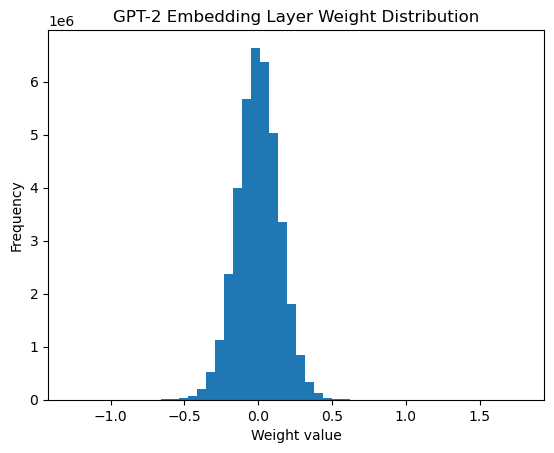

In [6]:
import matplotlib.pyplot as plt

# Flatten and convert to numpy
weights = model.transformer.wte.weight.detach().cpu().numpy().flatten()

plt.hist(weights, bins=50)
plt.title("GPT-2 Embedding Layer Weight Distribution")
plt.xlabel("Weight value")
plt.ylabel("Frequency")
plt.show()